Examines the performance of linear and polynomial regression, and uses SequentialFeatureSelector to determine most important features in the dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
TRAIN_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTrain.csv"
TEST_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTest.csv"

### DATA SETUP

In [3]:
trainPD = pd.read_csv(TRAIN_DATA_PATH)
testPD = pd.read_csv(TEST_DATA_PATH)

trainPD = trainPD.fillna(0)
testPD = testPD.fillna(0)

In [4]:
label_cols = ['target']

# relevant features chosen based on 1) data context and 
# 2) the SequentialFeatureSelector below.
feature_cols = [
                'precipitable_water_entire_atmosphere',
                'specific_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density',
                'L3_CO_H2O_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_SO2_SO2_column_number_density',
]

feature_cols_full = [
                'precipitable_water_entire_atmosphere',
                'relative_humidity_2m_above_ground',
                'specific_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'u_component_of_wind_10m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_NO2_slant_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_cloud_fraction',
                'L3_NO2_stratospheric_NO2_column_number_density',
                'L3_NO2_tropopause_pressure',
                'L3_NO2_tropospheric_NO2_column_number_density',
                'L3_O3_O3_column_number_density',
                'L3_O3_O3_effective_temperature',
                'L3_O3_cloud_fraction',
                'L3_CO_CO_column_number_density',
                'L3_CO_H2O_column_number_density',
                'L3_CO_cloud_height',
                'L3_HCHO_HCHO_slant_column_number_density',
                'L3_HCHO_cloud_fraction',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
                'L3_CLOUD_cloud_base_height',
                'L3_CLOUD_cloud_base_pressure',
                'L3_CLOUD_cloud_fraction',
                'L3_CLOUD_cloud_optical_depth',
                'L3_CLOUD_cloud_top_height',
                'L3_CLOUD_cloud_top_pressure',
                'L3_CLOUD_surface_albedo',
                'L3_AER_AI_absorbing_aerosol_index',
                'L3_SO2_SO2_column_number_density',
                'L3_SO2_SO2_column_number_density_amf',
                'L3_SO2_SO2_slant_column_number_density',
                'L3_SO2_absorbing_aerosol_index',
                'L3_SO2_cloud_fraction',
                'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', # bad data 
                'L3_CH4_aerosol_height',
                'L3_CH4_aerosol_optical_depth'
]

In [5]:
# partition features matrix and target matrix 
X = trainPD[feature_cols]
y = trainPD[label_cols]

# split training data into training and validation (default 75% and 25% split)
Xtrain, Xval, ytrain, yval = train_test_split(X, y, random_state=42)

In [6]:
Xtrain.head()

,precipitable_water_entire_atmosphere,specific_humidity_2m_above_ground,temperature_2m_above_ground,L3_NO2_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density
18386,15.500000,0.004229,5.585741,0.000069,0.155608,0.000000,0.000000,0.000000,0.000000
13906,13.200000,0.005473,10.474451,0.000070,0.134902,0.045020,633.483717,0.000148,-0.000113
27896,9.108644,0.003550,6.236047,0.000232,0.135133,0.045054,547.282861,0.000106,0.000144
3463,9.940000,0.003854,8.377051,0.000067,0.111400,0.051573,684.692994,0.000051,0.000627
6706,14.900001,0.006390,10.458612,0.000099,0.139906,0.030086,1020.602304,0.000107,0.000105


# MODEL TRAINING

In [7]:
def eval_model(model, data):
  Xtrain, ytrain, Xval, yval = data
  model.fit(Xtrain, ytrain)
  # print(type(model.predict(Xval)))
  ypred = model.predict(Xval).flatten()
  ypred = pd.Series(ypred, name="predicted")
  yval_reindexed = yval.reset_index().drop('index', axis=1)
  val_performance = pd.concat([yval_reindexed, ypred], axis=1)
  val_performance['error']=val_performance['predicted']-val_performance['target']
  RMSE = np.sqrt(mean_squared_error(
      val_performance['target'], val_performance['predicted']))
  
  return val_performance, RMSE

data = (Xtrain, ytrain, Xval, yval)

def visualize_error(model, data):
  val_performance, RMSE = eval_model(model, data)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  plt.scatter(x=val_performance['target'], y=val_performance['target'], alpha=0.2)
  plt.scatter(x=val_performance['target'], y=val_performance['predicted'], 
              alpha=0.2, c='orange')
  ax.set_aspect('equal')
  ax.set_xlabel('true')
  ax.set_ylabel('predicted')
  ax.legend(['true', 'predicted'])

## Linear Regression

In [10]:
model_linreg = LinearRegression(fit_intercept=True)
val_performance_linreg, RMSE_linreg = eval_model(model_linreg, data)
print('RMSE: ', RMSE_linreg)
val_performance_linreg.head(10)

RMSE:  41.06637251644207


,target,predicted,error
0,79.0,66.733702,-12.266298
1,129.0,65.419701,-63.580299
2,72.0,69.786722,-2.213278
3,34.0,88.354521,54.354521
4,61.0,52.526785,-8.473215
5,198.0,148.950805,-49.049195
6,26.0,57.490589,31.490589
7,124.0,37.066511,-86.933489
8,25.0,51.022803,26.022803
9,27.0,40.005626,13.005626


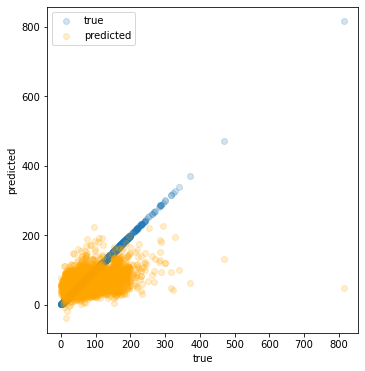

In [11]:
visualize_error(model_linreg, data)

## Polynomial Regression with Grid Search

In [12]:
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), 
                       LinearRegression(**kwargs))

### Hyperparameter tuning

In [13]:
param_grid = {'polynomialfeatures__degree': np.arange(1, 4), 
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5) 

In [14]:
grid.fit(Xtrain, ytrain);

In [15]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}

In [16]:
# cross validation

model_best = grid.best_estimator_

scoring = {'negRMSE' : 'neg_root_mean_squared_error',
           'R2' : 'r2',
           'max_error' : 'max_error'}

scores = cross_validate(model_best, X, y['target'], cv=5, scoring=scoring)

print('-RMSE: ', scores['test_negRMSE'])
print('R2: ', scores['test_R2'])
print('max error: ', scores['test_max_error'])

-RMSE:  [-41.42052092 -37.56869547 -36.35159121 -44.42861492 -40.44065113]
R2:  [0.23641883 0.20754841 0.25853428 0.27217434 0.28652191]
max error:  [-771.92648876 -517.78126069 -309.44694936 -256.04240792 -410.81258882]


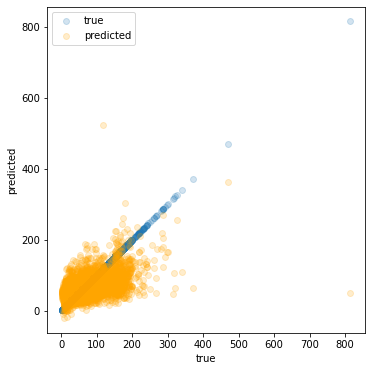

In [17]:
visualize_error(model_best, data)

## Feature Selection

In [18]:
X_full = trainPD[feature_cols_full]

In [21]:
sfs_forward = SequentialFeatureSelector(model_best, n_features_to_select=11,
                                        direction='forward')
sfs_forward.fit(X_full, y)

SequentialFeatureSelector(estimator=Pipeline(steps=[('polynomialfeatures',
                                                     PolynomialFeatures()),
                                                    ('linearregression',
                                                     LinearRegression())]),
                          n_features_to_select=11)

In [22]:
print('forward features:')
for i in range(len(feature_cols_full)):
  if sfs_forward.get_support()[i]:
    print(feature_cols_full[i])

forward features:
relative_humidity_2m_above_ground
temperature_2m_above_ground
u_component_of_wind_10m_above_ground
v_component_of_wind_10m_above_ground
L3_NO2_NO2_column_number_density
L3_NO2_NO2_slant_column_number_density
L3_NO2_absorbing_aerosol_index
L3_NO2_tropopause_pressure
L3_CO_CO_column_number_density
L3_CO_cloud_height
L3_HCHO_tropospheric_HCHO_column_number_density


backwards feature selection was aborted as it takes significantly longer to compute than forward feature selection. 